In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
thy = pd.read_csv('/content/sample_data/uci_thyroid03.csv')

In [3]:
thy

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3 measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,thyroid_class
0,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative
1,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative
2,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative
3,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative
4,18,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.03,f,?,t,183,t,1.3,t,141,f,?,other,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7535,30,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative
7536,68,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1,t,2.1,t,124,t,1.08,t,114,f,?,SVI,negative
7537,74,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,t,5.1,t,1.8,t,112,t,1.07,t,105,f,?,other,negative
7538,72,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.7,t,2,t,82,t,0.94,t,87,f,?,SVI,negative


In [4]:
thy['thyroid_class'].value_counts()

negative        7193
hypothyroid      220
hyperthyroid     127
Name: thyroid_class, dtype: int64

# Missing Values

In [5]:
for s in thy.columns:
    thy[s] = thy[s].apply(lambda x: np.nan if x=='?' else x)

In [6]:
thy.isnull().sum()

age                             2
sex                           300
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           736
T3 measured                     0
T3                           1536
TT4_measured                    0
TT4                           460
T4U_measured                    0
T4U                           772
FTI_measured                    0
FTI                           768
TBG_measured                    0
TBG                          7540
referral_source                 0
thyroid_class 

In [ ]:
thy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7540 entries, 0 to 7539
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        7538 non-null   object 
 1   sex                        7240 non-null   object 
 2   on_thyroxine               7540 non-null   object 
 3   query_on_thyroxine         7540 non-null   object 
 4   on_antithyroid_medication  7540 non-null   object 
 5   sick                       7540 non-null   object 
 6   pregnant                   7540 non-null   object 
 7   thyroid_surgery            7540 non-null   object 
 8   I131_treatment             7540 non-null   object 
 9   query_hypothyroid          7540 non-null   object 
 10  query_hyperthyroid         7540 non-null   object 
 11  lithium                    7540 non-null   object 
 12  goitre                     7540 non-null   object 
 13  tumor                      7540 non-null   objec

In [ ]:
thy.drop('TBG',axis=1,inplace=True)#TBG is dropped

# Missing values in Age column

In [ ]:
thy[thy['age'].isnull()]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3 measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,thyroid_class
1984,NaN,F,t,f,f,f,f,f,t,f,f,f,f,f,f,f,t,0.6,t,1.5,t,120,t,0.82,t,146,f,other,negative
4783,NaN,F,t,f,f,f,f,f,t,f,f,f,f,f,f,f,t,0.6,t,1.5,t,120,t,0.82,t,146,f,other,negative


In [ ]:
thy.drop([1984,4783],inplace=True) #missing age values are dropped

In [ ]:
thy.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3 measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'referral_source',
       'thyroid_class'],
      dtype='object')

In [ ]:
thy['age'].isnull().sum()

0

In [ ]:
thy['age'] = thy['age'].apply(int)

# Outliers in age column

In [ ]:
thy[thy['age']==thy['age'].max()]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3 measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,thyroid_class
1363,455,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.1,t,2,t,118,t,1.13,t,104,f,SVI,negative
4162,455,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.1,t,2,t,118,t,1.13,t,104,f,SVI,negative


In [ ]:
thy.drop([1363,4162],axis=0,inplace=True) #outlier is dropped

In [ ]:
thy[thy['age']==thy['age'].max()]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3 measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,thyroid_class
1128,94,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,3.9,f,NaN,t,157,t,1.02,t,154,f,SVI,negative
2672,94,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.9,t,1.3,t,119,t,1.04,t,114,f,SVI,negative
3927,94,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,3.9,f,NaN,t,157,t,1.02,t,154,f,SVI,negative
5471,94,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.9,t,1.3,t,119,t,1.04,t,114,f,SVI,negative


# For Sex column

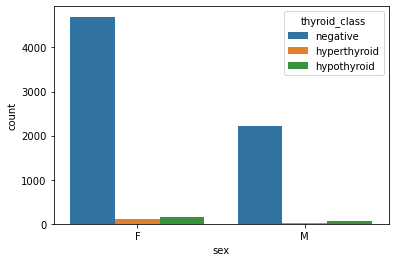

In [ ]:
sns.countplot(x='sex',data=thy,hue='thyroid_class')

In [ ]:
thy['sex'] = thy['sex'].fillna(thy['sex'].mode()[0]) 

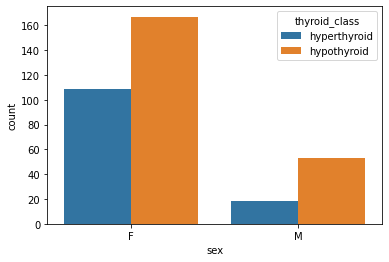

In [ ]:
sns.countplot(x='sex',data=thy[thy['thyroid_class']!='negative'],hue='thyroid_class')

# Missing values TSH column

In [ ]:
thy['TSH'].median()

1.4

In [ ]:
thy['TSH'] = thy['TSH'].fillna(thy['TSH'].median())

In [ ]:
thy['TSH'].isnull().sum()

0

In [ ]:
thy['TSH'] = thy['TSH'].apply(float)

# Outliers in TSH column

{'whiskers': [<matplotlib.lines.Line2D at 0x22a25c7ab08>,
 'caps': [<matplotlib.lines.Line2D at 0x22a25ef3908>,
 'boxes': [<matplotlib.lines.Line2D at 0x22a25c7a288>],
 'medians': [<matplotlib.lines.Line2D at 0x22a25ef8788>],
 'fliers': [<matplotlib.lines.Line2D at 0x22a25ef8e88>],
 'means': []}

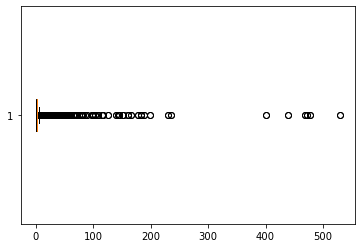

In [ ]:
plt.boxplot(thy['TSH'],vert=False)

In [ ]:
thy['TSH']

0       4.10
1       0.98
2       0.16
3       0.72
4       0.03
        ... 
7535    1.40
7536    1.00
7537    5.10
7538    0.70
7539    1.00
Name: TSH, Length: 7540, dtype: float64

In [ ]:
Q1_tsh = thy['TSH'].quantile(0.25)
Q3_tsh = thy['TSH'].quantile(0.75)
IQR_tsh = Q3_tsh - Q1_tsh
print(IQR_tsh)

1.9


In [ ]:
thy1 = thy.copy()

# Dropping outliers of TSH

In [ ]:
df = thy[(thy['TSH'] < (Q1_tsh - 1.5 * IQR_tsh)) | (thy['TSH'] > (Q3_tsh + 1.5 * IQR_tsh))]

In [ ]:
drop_index = list(df[df['thyroid_class']=='negative'].index)

In [ ]:
thy.drop(drop_index,axis=0,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x22a25f5bb48>,
 'caps': [<matplotlib.lines.Line2D at 0x22a25f5fa48>,
 'boxes': [<matplotlib.lines.Line2D at 0x22a25f5b988>],
 'medians': [<matplotlib.lines.Line2D at 0x22a25f64e88>],
 'fliers': [<matplotlib.lines.Line2D at 0x22a25f64fc8>],
 'means': []}

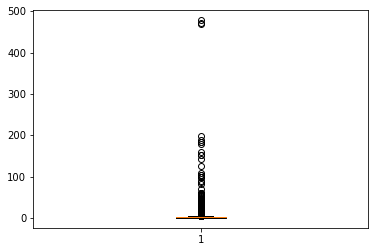

In [ ]:
plt.boxplot(thy['TSH'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22a26ea0f48>,
 'caps': [<matplotlib.lines.Line2D at 0x22a26ea4e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x22a26ea0d88>],
 'medians': [<matplotlib.lines.Line2D at 0x22a26ea7c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x22a26eae9c8>],
 'means': []}

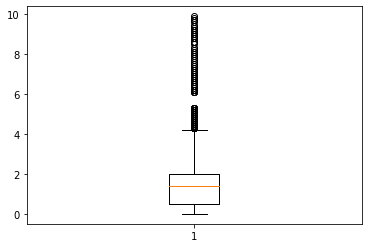

In [ ]:
plt.boxplot(thy[thy['TSH']<10]['TSH'])

# Missing values in T3 column

In [18]:
thy['T3']=thy['T3'].fillna(thy['T3'].median())

In [19]:
thy['T3']=thy['T3'].apply(float)

# Outliers in T3 column

{'boxes': [<matplotlib.lines.Line2D at 0x7fae6d5730b8>],
 'caps': [<matplotlib.lines.Line2D at 0x7fae6d573ac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fae6d57b588>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fae6d57b208>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fae6d5733c8>,
  <matplotlib.lines.Line2D at 0x7fae6d573748>]}

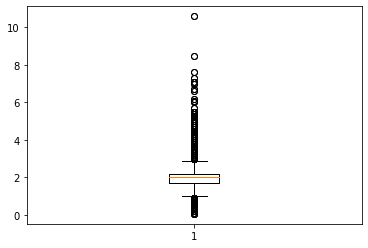

In [20]:
plt.boxplot(thy['T3'])

In [21]:
Q1_t3 = thy['T3'].quantile(0.25)
Q3_t3 = thy['T3'].quantile(0.75)
IQR_t3 = Q3_t3 - Q1_t3
print(IQR_t3)

0.5000000000000002


In [ ]:
np.array(thy[(thy['T3'] < (Q1_t3 - 1.5 * IQR_t3)) | (thy['T3'] > (Q3_t3 + 1.5 * IQR_t3))]['T3'])

# Missing values in TT4

In [9]:
thy['TT4']=thy['TT4'].fillna(thy['TT4'].median())

In [10]:
thy['TT4']=thy['TT4'].apply(float)

# Outliers in TT4

{'boxes': [<matplotlib.lines.Line2D at 0x7fae77692080>],
 'caps': [<matplotlib.lines.Line2D at 0x7fae76bfc668>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fae76c05128>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fae76bfcd68>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fae76be5f28>,
  <matplotlib.lines.Line2D at 0x7fae76bfc2e8>]}

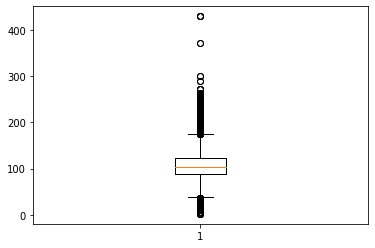

In [11]:
plt.boxplot(thy['TT4'])

In [12]:
Q1_tt4 = thy['TT4'].quantile(0.25)
Q3_tt4 = thy['TT4'].quantile(0.75)
IQR_tt4 = Q3_tt4 - Q1_tt4
print(IQR_tt4)

34.0


In [ ]:
np.array(thy[(thy['TT4'] < (Q1_tt4 - 1.5 * IQR_tt4)) | (thy['TT4'] > (Q3_tt4 + 1.5 * IQR_tt4))]['TT4'])

# Missing values in T4U

In [23]:
thy['T4U']=thy['T4U'].fillna(thy['T4U'].median())

In [24]:
thy['T4U']=thy['T4U'].apply(float)

# Outliers in T4U

{'boxes': [<matplotlib.lines.Line2D at 0x7fae6d493198>],
 'caps': [<matplotlib.lines.Line2D at 0x7fae6d493ba8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fae6d49f668>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fae6d49f2e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fae6d4934a8>,
  <matplotlib.lines.Line2D at 0x7fae6d493828>]}

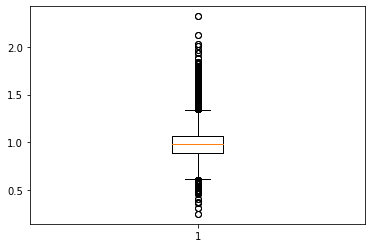

In [25]:
plt.boxplot(thy['T4U'])

In [26]:
Q1_t4u = thy['T4U'].quantile(0.25)
Q3_t4u = thy['T4U'].quantile(0.75)
IQR_t4u = Q3_t4u - Q1_t4u
print(IQR_t4u)

0.18000000000000005


In [ ]:
np.array(thy[(thy['T4U'] < (Q1_t4u - 1.5 * IQR_t4u)) | (thy['T4U'] > (Q3_t4u + 1.5 * IQR_t4u))]['T4U'])

# Missing values in FTI

In [28]:
thy['FTI']=thy['FTI'].fillna(thy['FTI'].median())

In [29]:
thy['FTI']=thy['FTI'].apply(float)

# Outliers in FTI

{'whiskers': [<matplotlib.lines.Line2D at 0x22a27006848>,
 'caps': [<matplotlib.lines.Line2D at 0x22a2700a648>,
 'boxes': [<matplotlib.lines.Line2D at 0x22a26fdaf88>],
 'medians': [<matplotlib.lines.Line2D at 0x22a2700ae88>],
 'fliers': [<matplotlib.lines.Line2D at 0x22a2700ebc8>],
 'means': []}

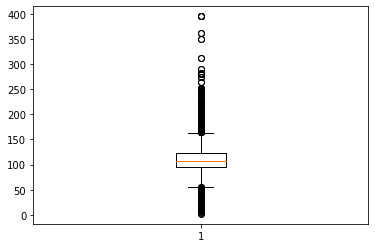

In [ ]:
plt.boxplot(thy['FTI'])

In [30]:
Q1_tu = thy['FTI'].quantile(0.25)
Q3_tu = thy['FTI'].quantile(0.75)
IQR_tu = Q3_tu - Q1_tu
print(IQR_tu)

28.0


In [ ]:
np.array(thy[(thy['FTI'] < (Q1_tu - 1.5 * IQR_tu)) | (thy['FTI'] > (Q3_tu + 1.5 * IQR_tu))]['FTI'])

In [ ]:
thy.isnull().sum()#No missing values

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
referral_source              0
thyroid_class                0
dtype: int64

In [ ]:
thy.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3 measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'referral_source',
       'thyroid_class'],
      dtype='object')

In [ ]:
thy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6932 entries, 0 to 7539
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        6932 non-null   int64  
 1   sex                        6932 non-null   object 
 2   on_thyroxine               6932 non-null   object 
 3   query_on_thyroxine         6932 non-null   object 
 4   on_antithyroid_medication  6932 non-null   object 
 5   sick                       6932 non-null   object 
 6   pregnant                   6932 non-null   object 
 7   thyroid_surgery            6932 non-null   object 
 8   I131_treatment             6932 non-null   object 
 9   query_hypothyroid          6932 non-null   object 
 10  query_hyperthyroid         6932 non-null   object 
 11  lithium                    6932 non-null   object 
 12  goitre                     6932 non-null   object 
 13  tumor                      6932 non-null   objec

In [ ]:
thy['thyroid_class'].value_counts()

negative        6585
hypothyroid      220
hyperthyroid     127
Name: thyroid_class, dtype: int64

In [ ]:
y = thy.iloc[:,-1]

In [ ]:
y.value_counts()

negative        6585
hypothyroid      220
hyperthyroid     127
Name: thyroid_class, dtype: int64

In [ ]:
def thyroid(x):#function to change label
    if x=='negative':
        return 0
    elif x=='hypothyroid':
        return 1
    else:
        return 2

In [ ]:
y = y.apply(thyroid)

In [ ]:
y.value_counts()

0    6585
1     220
2     127
Name: thyroid_class, dtype: int64

In [ ]:
X = thy.iloc[:,:-1]

In [ ]:
X.iloc[:,-1].value_counts()

other    4010
SVI      1890
SVHC      750
STMW      209
SVHD       73
Name: referral_source, dtype: int64

In [ ]:
X = pd.get_dummies(X.iloc[:,:-1],drop_first=True)

In [ ]:
X.columns

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'sex_M', 'on_thyroxine_t',
       'query_on_thyroxine_t', 'on_antithyroid_medication_t', 'sick_t',
       'pregnant_t', 'thyroid_surgery_t', 'I131_treatment_t',
       'query_hypothyroid_t', 'query_hyperthyroid_t', 'lithium_t', 'goitre_t',
       'tumor_t', 'hypopituitary_t', 'psych_t', 'TSH_measured_t',
       'T3 measured_t', 'TT4_measured_t', 'T4U_measured_t', 'FTI_measured_t'],
      dtype='object')

In [ ]:
df = pd.get_dummies(thy.iloc[:,-2])

In [ ]:
df

,STMW,SVHC,SVHD,SVI,other
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,1,0
4,0,0,0,0,1
...,...,...,...,...,...
7535,0,0,0,0,1
7536,0,0,0,1,0
7537,0,0,0,0,1
7538,0,0,0,1,0


In [ ]:
X = pd.concat([X,df],axis=1)

In [ ]:
len(X.columns)

31

In [ ]:
X

,age,TSH,T3,TT4,T4U,FTI,sex_M,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_medication_t,...,TSH_measured_t,T3 measured_t,TT4_measured_t,T4U_measured_t,FTI_measured_t,STMW,SVHC,SVHD,SVI,other
0,23,4.10,2.0,102.0,0.97,108.0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,1
1,46,0.98,2.0,109.0,0.91,120.0,1,0,0,0,...,1,0,1,1,1,0,0,0,0,1
2,70,0.16,1.9,175.0,0.97,108.0,0,1,0,0,...,1,1,1,0,0,0,0,0,0,1
3,70,0.72,1.2,61.0,0.87,70.0,0,0,0,0,...,1,1,1,1,1,0,0,0,1,0
4,18,0.03,2.0,183.0,1.30,141.0,0,1,0,0,...,1,0,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7535,30,1.40,2.0,105.0,0.97,108.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7536,68,1.00,2.1,124.0,1.08,114.0,0,0,0,0,...,1,1,1,1,1,0,0,0,1,0
7537,74,5.10,1.8,112.0,1.07,105.0,0,0,0,0,...,1,1,1,1,1,0,0,0,0,1
7538,72,0.70,2.0,82.0,0.94,87.0,1,0,0,0,...,1,1,1,1,1,0,0,0,1,0


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
7535    0
7536    0
7537    0
7538    0
7539    0
Name: thyroid_class, Length: 6932, dtype: int64

# Final DataFrame

In [ ]:
thyroid_fin = pd.concat([X,y],axis=1)

In [ ]:
thyroid_fin

,age,TSH,T3,TT4,T4U,FTI,sex_M,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_medication_t,...,T3 measured_t,TT4_measured_t,T4U_measured_t,FTI_measured_t,STMW,SVHC,SVHD,SVI,other,thyroid_class
0,23,4.10,2.0,102.0,0.97,108.0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
1,46,0.98,2.0,109.0,0.91,120.0,1,0,0,0,...,0,1,1,1,0,0,0,0,1,0
2,70,0.16,1.9,175.0,0.97,108.0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
3,70,0.72,1.2,61.0,0.87,70.0,0,0,0,0,...,1,1,1,1,0,0,0,1,0,0
4,18,0.03,2.0,183.0,1.30,141.0,0,1,0,0,...,0,1,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7535,30,1.40,2.0,105.0,0.97,108.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7536,68,1.00,2.1,124.0,1.08,114.0,0,0,0,0,...,1,1,1,1,0,0,0,1,0,0
7537,74,5.10,1.8,112.0,1.07,105.0,0,0,0,0,...,1,1,1,1,0,0,0,0,1,0
7538,72,0.70,2.0,82.0,0.94,87.0,1,0,0,0,...,1,1,1,1,0,0,0,1,0,0


In [ ]:
thyroid_fin.to_csv('Fin_Uci_thyroid1.csv',index=False)